In [4]:
import  math
import numpy as np
import lhapdf
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [5]:
datadir="/Users/johannes/Dropbox/lh_2017_NNLO_COMP_Bellm/data/"

Sherpa_MEPSatNLO=yoda.readYODA(datadir+"Sherpa/Jets/nlops.yoda")
Sherpa_PSatLO=yoda.readYODA(datadir+"Sherpa/Jets/nlops.yoda")

H7_NLO_PS=yoda.readYODA(datadir+"Herwig/Jets/NLOPS_C_HtHat_shhalf.yoda")
H7_LO_PS=yoda.readYODA(datadir+"Herwig/Jets/LOPS_C_HtHat_shhalf.yoda")

POWHEG=yoda.readYODA(datadir+"POWHEG/JJ/incl.yoda")



/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib

<Figure size 432x288 with 0 Axes>

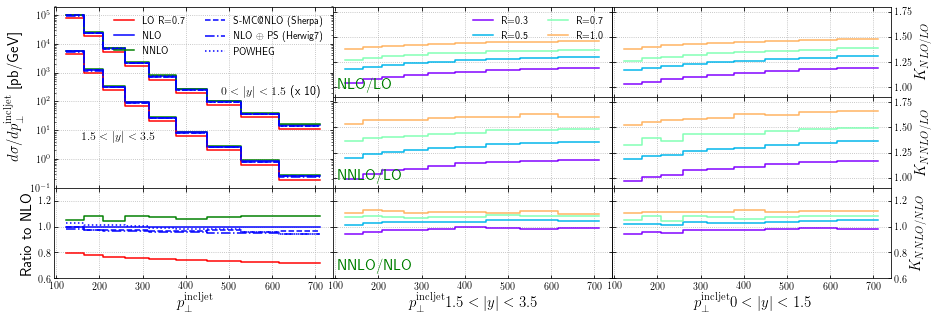

In [6]:
plt.clf()
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 5))
fig=plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(3, 3,width_ratios= [1,1,1],height_ratios= [1,1,1])
gs.update(wspace=0.0, hspace=0.0)
axmain     = plt.subplot(gs[0:2, 0])
axmainratio     = plt.subplot(gs[2, 0])
ax1     = plt.subplot(gs[0, 2])
ax2     = plt.subplot(gs[1, 2])
ax3     = plt.subplot(gs[0, 1])
ax4     = plt.subplot(gs[1, 1])
ax5     = plt.subplot(gs[2, 2])
ax6     = plt.subplot(gs[2, 1])


xxx=range(0,20,2)


def rebin(yo,name):    
    
    a=np.array(yo[name].yVals())[0:20]
    xmaxs=np.array(yo[name].xMaxs())[0:20]
    xmins=np.array(yo[name].xMins())[0:20]
    
    res=[sum((a*(xmaxs-xmins))[xxx[0]:xxx[1]])/(xmaxs[xxx[1]]-xmins[xxx[0]])]
    for i in range(1,len(xxx)-1):
        res+=[sum((a*(xmaxs-xmins))[xxx[i-1]:xxx[i]])/(xmaxs[xxx[i]]-xmins[xxx[i-1]]),
              sum((a*(xmaxs-xmins))[xxx[i]:xxx[i+1]])/(xmaxs[xxx[i+1]]-xmins[xxx[i]])]
    res+=[sum((a*(xmaxs-xmins))[xxx[-2]:xxx[-1]])/(xmaxs[xxx[-1]]-xmins[xxx[-2]]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1])]
    
    return np.array(res)


def rebinx(yo,name):
    a=np.array(yo[name].xVals())[0:20]
    res=[a[xxx[0]]]
    for i in range(1,len(xxx)):
        res+=[a[xxx[i]],a[xxx[i]]]
    res+=[a[-1]]
    return np.array(res)

NNLOJET_R_LO_3=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_LO.yoda")
NNLOJET_R_NLO_3=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NLO.yoda")
NNLOJET_R_NNLO_3=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NNLO.yoda")

    
for R,i in zip(["3","5","7","10"],range(6)):
    x=rebinx(NNLOJET_R_LO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    lo  = rebin(NNLOJET_R_LO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    
    nlo  = rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    
    nnlo  = rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d03-x01-y01-AK%s"%R)

    ax1.plot(x,nlo/lo,color=colors[i])
    ax2.plot(x,nnlo/lo,color=colors[i])
    ax5.plot(x,nnlo/nlo,color=colors[i])
    
for R,i in zip(["3","5","7","10"],range(6)):
    x=rebinx(NNLOJET_R_LO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    lo  = rebin(NNLOJET_R_LO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    
    nlo  = rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    
    nnlo  = rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    
    ax3.plot(x,nlo/lo,color=colors[i],label="R=%s"%(float(R)/10))
    ax4.plot(x,nnlo/lo,color=colors[i])
    ax6.plot(x,nnlo/nlo,color=colors[i])
    
for R,i in zip(["7"],range(1)):
    x=rebinx(NNLOJET_R_LO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    lo  = rebin(NNLOJET_R_LO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    nlo  = rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    nnlo  = rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    merge  = rebin(Sherpa_MEPSatNLO,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    merge  +=rebin(Sherpa_MEPSatNLO,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    merge  +=rebin(Sherpa_MEPSatNLO,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    match  = rebin(H7_NLO_PS,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    match  +=rebin(H7_NLO_PS,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    match  +=rebin(H7_NLO_PS,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    
    
    powh  = rebin(POWHEG,"/CMS_RAD/d01-x01-y01-AK%s"%R)
    powh  +=rebin(POWHEG,"/CMS_RAD/d02-x01-y01-AK%s"%R)
    powh  +=rebin(POWHEG,"/CMS_RAD/d03-x01-y01-AK%s"%R)
    
    
    
    axmain.plot(x,lo*10.,color="red",label="LO R=0.7")
    axmain.plot(x,nlo*10.,color="blue",label="NLO ")
    axmain.plot(x,nnlo*10.,color="green",label="NNLO ")
    
    axmain.plot(x,match*10.,color="blue",label="S-MC@NLO (Sherpa)",linestyle="--")
    axmain.plot(x,merge*10.,color="blue",label="NLO $\oplus$ PS (Herwig7) ",linestyle="-.")
    axmain.plot(x,powh*10.,color="blue",label="POWHEG ",linestyle="dotted")
    
    axmainratio.plot(x,nnlo/nlo,color="green",label="NNLO R=0.7")
    axmainratio.plot(x,nlo/nlo,color="blue",label="NLO R=0.7")
    axmainratio.plot(x,lo/nlo,color="red",label="LO R=0.7")
    axmainratio.plot(x,match/nlo,color="blue",label="MC@NLO (Sherpa) R=0.7",linestyle="--")
    axmainratio.plot(x,merge/nlo,color="blue",label="NLO $\oplus$ PS (Herwig7) R=0.7",linestyle="-.")
    axmainratio.plot(x,powh/nlo,color="blue",label="POWHEG R=0.7",linestyle="dotted")
    
    
    
    x=rebinx(NNLOJET_R_LO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    lo  = rebin(NNLOJET_R_LO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    lo  +=rebin(NNLOJET_R_LO_3,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    nlo  = rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    nlo  +=rebin(NNLOJET_R_NLO_3,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    nnlo  = rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    nnlo  +=rebin(NNLOJET_R_NNLO_3,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    merge  = rebin(Sherpa_MEPSatNLO,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    merge  +=rebin(Sherpa_MEPSatNLO,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    merge  +=rebin(Sherpa_MEPSatNLO,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    match  = rebin(H7_NLO_PS,"/CMS_RAD/d04-x01-y01-AK%s"%R)
    match  +=rebin(H7_NLO_PS,"/CMS_RAD/d05-x01-y01-AK%s"%R)
    match  +=rebin(H7_NLO_PS,"/CMS_RAD/d06-x01-y01-AK%s"%R)
    axmain.plot(x,nnlo,color="green",label="")
    axmain.plot(x,nlo,color="blue",label="")
    axmain.plot(x,lo,color="red",label="")
    axmain.plot(x,match,color="blue",label="",linestyle="--")
    axmain.plot(x,merge,color="blue",label="",linestyle="-.")
    
    


       
axmain.semilogy()
    
ax1.set_ylim([0.9,1.8])
ax2.set_ylim([0.9,1.8])
ax3.set_ylim([0.9,1.8])
ax4.set_ylim([0.9,1.8])
ax5.set_ylim([0.6,1.3])
ax6.set_ylim([0.6,1.3])
axmainratio.set_ylim([0.6,1.3])




# X labels:
axmain.set_xlabel("$p_\perp^{\mathrm{incl jet}}$", fontsize=15)
axmainratio.set_xlabel("$p_\perp^{\mathrm{incl jet}}$", fontsize=15)
axmainratio.set_ylabel(r"Ratio to NLO", fontsize=15)
ax5.set_xlabel("$p_\perp^{\mathrm{incl jet}} 0<|y|<1.5$ ", fontsize=15)
ax6.set_xlabel("$p_\perp^{\mathrm{incl jet}} 1.5<|y|<3.5$", fontsize=15)

axmain.text(0.6, 0.5, "$0<|y|<1.5$ (x 10)",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=axmain.transAxes, color='black', fontsize=12)
axmain.text(0.1, 0.25, "$1.5<|y|<3.5$ ",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=axmain.transAxes, color='black', fontsize=12)


# Y labels:
axmain.set_ylabel(r"$d\sigma/d p_\perp^{\mathrm{incl jet}}$ [pb/GeV]", fontsize=15)
ax1.set_ylabel("$K_{NLO/LO}$", fontsize=15)
ax2.set_ylabel("$K_{NNLO/LO}$", fontsize=15)
ax5.set_ylabel("$K_{NNLO/NLO}$", fontsize=15)
ax1.yaxis.set_label_position("right")
ax2.yaxis.set_label_position("right")
ax5.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax2.yaxis.tick_right()
ax5.yaxis.tick_right()
ax1.yaxis.set_ticks_position("both")
ax4.yaxis.set_ticks_position("both")
ax5.yaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")
ax3.yaxis.set_ticks_position("both")
ax6.yaxis.set_ticks_position("both")
axmain.yaxis.set_ticks_position("both")
axmainratio.yaxis.set_ticks_position("both")
ax1.yaxis.set_tick_params(direction="in",which="both")
ax2.yaxis.set_tick_params(direction="in",which="both")
ax3.yaxis.set_tick_params(direction="in",which="both")
ax4.yaxis.set_tick_params(direction="in",which="both")
ax5.yaxis.set_tick_params(direction="in",which="both")
ax6.yaxis.set_tick_params(direction="in",which="both")
axmain.yaxis.set_tick_params(direction="in",which="both")
axmainratio.yaxis.set_tick_params(direction="in",which="both")
ax1.grid(linestyle='dotted');
ax2.grid(linestyle='dotted');
ax5.grid(linestyle='dotted');
ax3.grid(linestyle='dotted');
ax4.grid(linestyle='dotted');
ax6.grid(linestyle='dotted');
axmain.grid(linestyle='dotted');
axmainratio.grid(linestyle='dotted');
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax6.set_yticklabels([])
# Legends:
ax3.legend(frameon=False,loc="upper right",ncol=2)
axmain.legend(frameon=False,ncol=2)

axmain.set_xticklabels([])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])



ax1.xaxis.set_ticks_position("both")
ax4.xaxis.set_ticks_position("both")
ax5.xaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax3.xaxis.set_ticks_position("both")
ax6.xaxis.set_ticks_position("both")
axmain.xaxis.set_ticks_position("both")
axmainratio.xaxis.set_ticks_position("both")


ax1.xaxis.set_tick_params(direction="in",which="both")
ax2.xaxis.set_tick_params(direction="in",which="both")
ax3.xaxis.set_tick_params(direction="in",which="both")
ax4.xaxis.set_tick_params(direction="in",which="both")
ax5.xaxis.set_tick_params(direction="in",which="both")
ax6.xaxis.set_tick_params(direction="in",which="both")
axmain.xaxis.set_tick_params(direction="in",which="both")
axmainratio.xaxis.set_tick_params(direction="in",which="both")




# Additional Text:
ax3.text(0.02, 0.05, "NLO/LO",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax3.transAxes, color='green', fontsize=15)
ax4.text(0.02, 0.05, "NNLO/LO",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax4.transAxes, color='green', fontsize=15)
ax6.text(0.02, 0.05, "NNLO/NLO",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax6.transAxes, color='green', fontsize=15)



plt.show()
    
fig.savefig("Fig_V_14_J_2.pdf",bbox_inches='tight')